In [3]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [4]:
#Lecture des données
data = pd.read_excel("/home/congo/Bureau/2022-m1-staps/data_motives/data_motives_final.xlsx","haller",) 

In [5]:
# mise a zero des valeurs manquantes
data = data.fillna(0)

#stoker le nom des colonnes
column_name = [c for c in data]

In [6]:
data = data.to_numpy()
data = data[:,39:]
nlin ,ncol =data.shape
print('data' ,data.shape)

data (1075, 71)


Préprosseccing

In [7]:
# rendre toute les valeurs positives
data_correct = data
data = np.absolute(data)

In [8]:
#Supression des valeurs abérantes par rapport au seuil
seuil = 5*np.std(data,axis=0,dtype = np.float64)
#print(seuil)
data = np.array(data)
data_tmp = np.zeros_like(data)
data_tmp[data < seuil] = data[data < seuil]
data = data_tmp
#print(data)

In [9]:
#normalisation par ligne (avec ecartype nul) our avoir des valeurs entre 0 et 1

#indices à suprimer
max = np.max(data,axis = 1)
indices = [i for i, e in enumerate(max) if e == 0]
#print(indices)

#suppression des lignes
data_del = np.delete(data,indices,axis = 0)
data = data_del

#normalisation par ligne sans ecartype nul pour avoir des valeurs entre 0 et 1
min = np.min(data,axis = 1)
max = np.max(data,axis = 1)
data = (data-min[:,np.newaxis])/max[:,np.newaxis]

#print(data)


In [10]:
# retour des valeurs négatives

#suppression des lignes
data_del = np.delete(data_correct,indices,axis = 0)
data_correct = data_del

#print("data before = ", data[data < 0])

#indices des valeurs négatives
indices_val_neg_i = np.where(data_correct < 0)
#print("indices_val_neg_i = ",indices_val_neg_i)

data[indices_val_neg_i] = -1*data[indices_val_neg_i]


#print("data after = ", data[data < 0] )
nlin ,ncol =data.shape


 Cluster Algorithm 

1) CAH algorithm 

In [12]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 


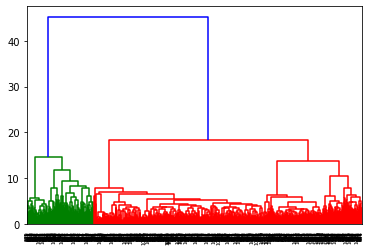

In [13]:
#create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))

In [14]:
hc = AgglomerativeClustering(n_clusters=3,affinity= 'euclidean',linkage='ward' )


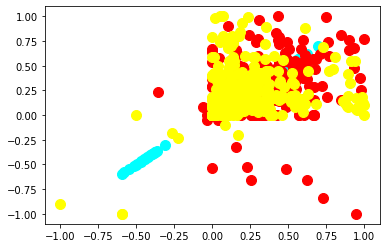

In [15]:
y_hc = hc.fit_predict(data)
plt.scatter(data[y_hc == 0,28],data[ y_hc == 0,28],s= 100,c = 'cyan')
plt.scatter(data[y_hc == 1,0],data[ y_hc == 1,1],s= 100,c = 'red')
plt.scatter(data[y_hc == 2,0],data[ y_hc == 2,1],s= 100,c = 'yellow')
plt.scatter(data[y_hc == 3,0],data[ y_hc == 3,1],s= 100,c = 'black')
plt.scatter(data[y_hc == 4,0],data[ y_hc == 4,1],s= 100,c = 'green')
plt.scatter(data[y_hc == 5,0],data[ y_hc == 5,1],s= 100,c = 'green')


K-means

In [16]:
from sklearn.cluster import KMeans


Text(0, 0.5, ' Cout du modele inertia')

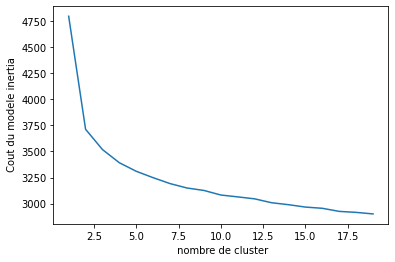

In [17]:
#nombre de cluster optimal 
# inertia calcule le cout (somme des distance entre les points d'un cluster et du centroide )
inertia =[]
K_range =range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(data)
    inertia.append(model.inertia_)


plt.plot(K_range,inertia)
plt.xlabel(" nombre de cluster")
plt.ylabel(" Cout du modele inertia")


# 2-6 clusters ? la zone de "coude"

Text(0.5, 0, " nombre d'étudiant")

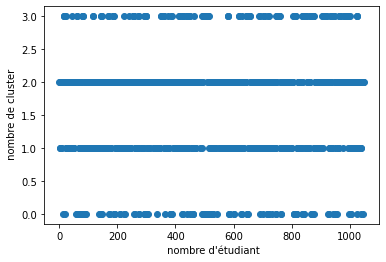

In [18]:
n_cluster = 4

model = KMeans(n_clusters= n_cluster)
model.fit(data)

y_pred = model.predict(data)
x_etudiant=range(0,nlin)

plt.scatter(x_etudiant,y_pred)
plt.ylabel(" nombre de cluster")
plt.xlabel(" nombre d'étudiant")

In [19]:
#cluster 0
indices_cluster_0 = np.where(data[y_pred == 0])
cluster_0 = data[y_pred == 0]

# retour du df
df_0 = pd.DataFrame(cluster_0)
df_0.columns = column_name[39:]
#print(df_0)

# trier par somme de toutes les colonnes
sum_colonne_0 = df_0.sum()
print(sum_colonne_0)

Confort            9.869337
Securite           4.934278
Qualite           14.082122
Force             12.164871
Maintien          11.459589
                    ...    
Role                0.71396
Performance       72.704679
Meilleur          35.487471
Individualiste    26.075965
detente           30.233541
Length: 71, dtype: object


In [20]:
#cluster 1
indices_cluster_1 = np.where(data[y_pred == 1])
cluster_1 = data[y_pred == 1]

# retour du df
df_1 = pd.DataFrame(cluster_1)
df_1.columns = column_name[39:]
#print(df_1)

# trier par somme de toutes les colonnes
sum_colonne_1 = df_1.sum()
print(sum_colonne_1)

Confort           80.844109
Securite          80.443325
Qualite           67.625472
Force             60.333416
Maintien          71.705501
                    ...    
Role              58.858482
Performance       52.679568
Meilleur          49.508842
Individualiste    64.587758
detente           69.038406
Length: 71, dtype: object


In [21]:
#cluster 2
indices_cluster_2 = np.where(data[y_pred == 2])
cluster_2 = data[y_pred == 2]

# retour du df
df_2 = pd.DataFrame(cluster_2)
df_2.columns = column_name[39:]
#print(df_2)

# trier par somme de toutes les colonnes
sum_colonne_2 = df_2.sum()
print(sum_colonne_2)

Confort           85.463125
Securite          79.805145
Qualite           61.818352
Force              67.66106
Maintien          72.705889
                    ...    
Role              55.307393
Performance       42.850163
Meilleur          44.070459
Individualiste    64.189784
detente           62.208717
Length: 71, dtype: object


In [22]:
#cluster 3
indices_cluster_3 = np.where(data[y_pred == 3])
cluster_3 = data[y_pred == 3]

# retour du df
df_3 = pd.DataFrame(cluster_3)
df_3.columns = column_name[39:]
#print(df_3)

# trier par somme de toutes les colonnes
sum_colonne_3 = df_3.sum()
print(sum_colonne_3)

Confort             3.779253
Securite            2.645647
Qualite             8.822367
Force               8.761379
Maintien           10.421686
                     ...    
Role               77.653981
Performance       127.712743
Meilleur          118.242917
Individualiste     65.381878
detente           106.902577
Length: 71, dtype: object


In [23]:
#cluster 4
indices_cluster_4 = np.where(data[y_pred == 4])
cluster_4 = data[y_pred == 4]

# retour du df
df_4 = pd.DataFrame(cluster_4)
df_4.columns = column_name[39:]
#print(df_4)

# trier par somme de toutes les colonnes
sum_colonne_4 = df_4.sum()
print(sum_colonne_4)

Confort           0.0
Securite          0.0
Qualite           0.0
Force             0.0
Maintien          0.0
                 ... 
Role              0.0
Performance       0.0
Meilleur          0.0
Individualiste    0.0
detente           0.0
Length: 71, dtype: float64


In [24]:
#cluster 5
indices_cluster_5 = np.where(data[y_pred == 5])
cluster_5 = data[y_pred == 5]

# retour du df
df_5 = pd.DataFrame(cluster_5)
df_5.columns = column_name[39:]
#print(df_5)

# trier par somme de toutes les colonnes
sum_colonne_5 = df_5.sum()
print(sum_colonne_5)

Confort           0.0
Securite          0.0
Qualite           0.0
Force             0.0
Maintien          0.0
                 ... 
Role              0.0
Performance       0.0
Meilleur          0.0
Individualiste    0.0
detente           0.0
Length: 71, dtype: float64


fuzzy cluster

In [25]:
from fcmeans import FCM


In [30]:
n_cluster = 2
fcm = FCM(n_clusters= n_cluster)
print(data.shape)
fcm.fit(data)

(1050, 71)


TypeError: invalid data type for einsum

In [ ]:
# outputs 
fcm_centers = fcm.centers
fcm_labels = fcm.predit(data)

data_train,data_test,data_validation

In [ ]:
data_train = data[:int(nlin*0.70),:int(ncol*0.70)]
data_test = data[int(nlin*0.70):,int(ncol*0.70):]

In [ ]:

#pour construire un pre-processsing

class MyStandardScaler:
       
    def fit(self,X_train):
        self.mean_=np.mean(X_train,axis=0)
        self.std_=np.std(X_train,axis=0)
                
    def transform(self,X):
        """
        Cette méthode peut notamment s'appliquer aux données test. 
        Mais dans ce cas là, c'est le la moyenne et l'écart type des données train qui doit être utiliser. 
        """
        assert len(X.shape)==2, "X must be a matrix"
        
        "res[i,j]=(X[i,j] - mean[j])/std[j]"
        res=(X-self.mean_[np.newaxis,:])/self.std_[np.newaxis,:]
        return res

    
    def fit_transform(self,X_train):
        self.fit(X_train)
        return self.transform(X_train)